   # Assignment 3 Kaggle Competition Forest Cover Type Prediction and Analysis

<img src = "forest.jpg">

## ABSTRACT

bla bla bla

In [60]:
# importing libraries

from __future__ import print_function
%matplotlib inline

import pandas as pd
from pandas.plotting import parallel_coordinates

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## THE DATA

##### Target Variable(Dependent Variable) 
Cover_Type: (7 types, integers 1 to 7) - Forest Cover Type designation                                              
1 - Spruce/Fir   
2 - Lodgepole Pine             
3 - Ponderosa Pine                                
4 - Cottonwood/Willow                       
5 - Aspen           
6 - Douglas-fir                                                  
7 - Krummholz

##### Predictors(Independent Variables)
A. Elevation - Elevation in meters                                                                                   
B. Aspect - Aspect in degrees azimuth                                                                                 
C. Slope - Slope in degrees                                                                                           
D. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features                                     
E. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features                                       
F. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway                                                     
G. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice                                          
H. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice                                         
I. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice                                         
J. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points     

K. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation         
1 - Rawah Wilderness Area                                                                                            
2 - Neota Wilderness Area                                                                                           
3 - Comanche Peak Wilderness Area                                                                           
4 - Cache la Poudre Wilderness Area  

L. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation     
1 - Cathedral family - Rock outcrop complex, extremely stony.                                                    
2 - Vanet - Ratake families complex, very stony.                                                                 
3 - Haploborolis - Rock outcrop complex, rubbly.                                                                   
4 - Ratake family - Rock outcrop complex, rubbly.                                                                 
5 - Vanet family - Rock outcrop complex complex, rubbly.                                                         
6 - Vanet - Wetmore families - Rock outcrop complex, stony.                                                           
7 - Gothic family.                                                                                                   
8 - Supervisor - Limber families complex.                                                                           
9 - Troutville family, very stony.                                                                                  
10 - Bullwark - Catamount families - Rock outcrop complex, rubbly.                                                   
11 - Bullwark - Catamount families - Rock land complex, rubbly.                                                   
12 - Legault family - Rock land complex, stony.                                                                   
13 - Catamount family - Rock land - Bullwark family complex, rubbly.                                                 
14 - Pachic Argiborolis - Aquolis complex.                                                                         
15 - unspecified in the USFS Soil and ELU Survey.                                                                  
16 - Cryaquolis - Cryoborolis complex.                                                                            
17 - Gateview family - Cryaquolis complex.                                                                      
18 - Rogert family, very stony.                                                                                 
19 - Typic Cryaquolis - Borohemists complex.                                                                   
20 - Typic Cryaquepts - Typic Cryaquolls complex.                                                           
21 - Typic Cryaquolls - Leighcan family, till substratum complex.                                    
22 - Leighcan family, till substratum, extremely bouldery.                                                     
23 - Leighcan family, till substratum - Typic Cryaquolls complex.                                               
24 - Leighcan family, extremely stony.                                                                 
25 - Leighcan family, warm, extremely stony.                                                                  
26 - Granile - Catamount families complex, very stony.                                                             
27 - Leighcan family, warm - Rock outcrop complex, extremely stony.                                                
28 - Leighcan family - Rock outcrop complex, extremely stony.                                                      
29 - Como - Legault families complex, extremely stony.                                                             
30 - Como family - Rock land - Legault family complex, extremely stony.                                             
31 - Leighcan - Catamount families complex, extremely stony.                                                       
32 - Catamount family - Rock outcrop - Leighcan family complex, extremely stony.                                     
33 - Leighcan - Catamount families - Rock outcrop complex, extremely stony.                                          
34 - Cryorthents - Rock land complex, extremely stony.                                                        
35 - Cryumbrepts - Rock outcrop - Cryaquepts complex.                                                           
36 - Bross family - Rock land - Cryumbrepts complex, extremely stony.                                              
37 - Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.                                          
38 - Leighcan - Moran families - Cryaquolls complex, extremely stony.                                                
39 - Moran family - Cryorthents - Leighcan family complex, extremely stony.                                      
40 - Moran family - Cryorthents - Rock land complex, extremely stony.


In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

##### Reading the train and test data from the CSV files

In [33]:
print('Size of train data',train.shape)
print('Size of test data',test.shape)

Size of train data (15120, 56)
Size of test data (565892, 55)


##### Printing the size of the train and test data

In [9]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


##### Displaying the first 5 values of the train.csv file as by default head() will provide us first five values

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

##### Displaying the info of the train.csv file to check all the details of all the fields present in it.

In [7]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


##### Checking the presence of null values in train.csv file

In [10]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


##### describe() results in 3 kind of data : Numeric Data(Default) , Object Data and Categorical Data.
##### describe() by default will include the numeric data(count,min,max,mean,std,lower percentile(default = 25%), 50 percentile and upper percentile(default = 75%)) which is displayed in our Output below.


##### By observing the mean and max values there is a lot of gap between them which means there are many outliers present. We can analyse with the help of quartiles there are three types of elevation cover


In [8]:
corr = train.corr()
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399


In [15]:
test['Soil_Type15'].value_counts()

0    565889
1         3
Name: Soil_Type15, dtype: int64

In [16]:
test['Soil_Type7'].value_counts()

0    565787
1       105
Name: Soil_Type7, dtype: int64

In [17]:
train['Soil_Type15'].value_counts()

0    15120
Name: Soil_Type15, dtype: int64

In [18]:
train['Soil_Type7'].value_counts()

0    15120
Name: Soil_Type7, dtype: int64

##### Above I am calculating the correlation of my attributes of my train.csv file

In [14]:
corr['Cover_Type'].sort_values(ascending = False)

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Soil_Type40                           0.205851
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Id                                    0.108363
Slope                                 0.087722
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37                           0.071210
Soil_Type17                           0.042453
Soil_Type13                           0.040528
Soil_Type5                            0.027692
Soil_Type36                           0.025726
Soil_Type2                            0.022627
Soil_Type14                           0.022019
Elevation                             0.016090
Soil_Type1                            0.015069
Wilderness_Area2                      0.014994
Soil_Type11  

##### Above I am displaying the correlation in the descending order for better understanding of the correlation between the columns

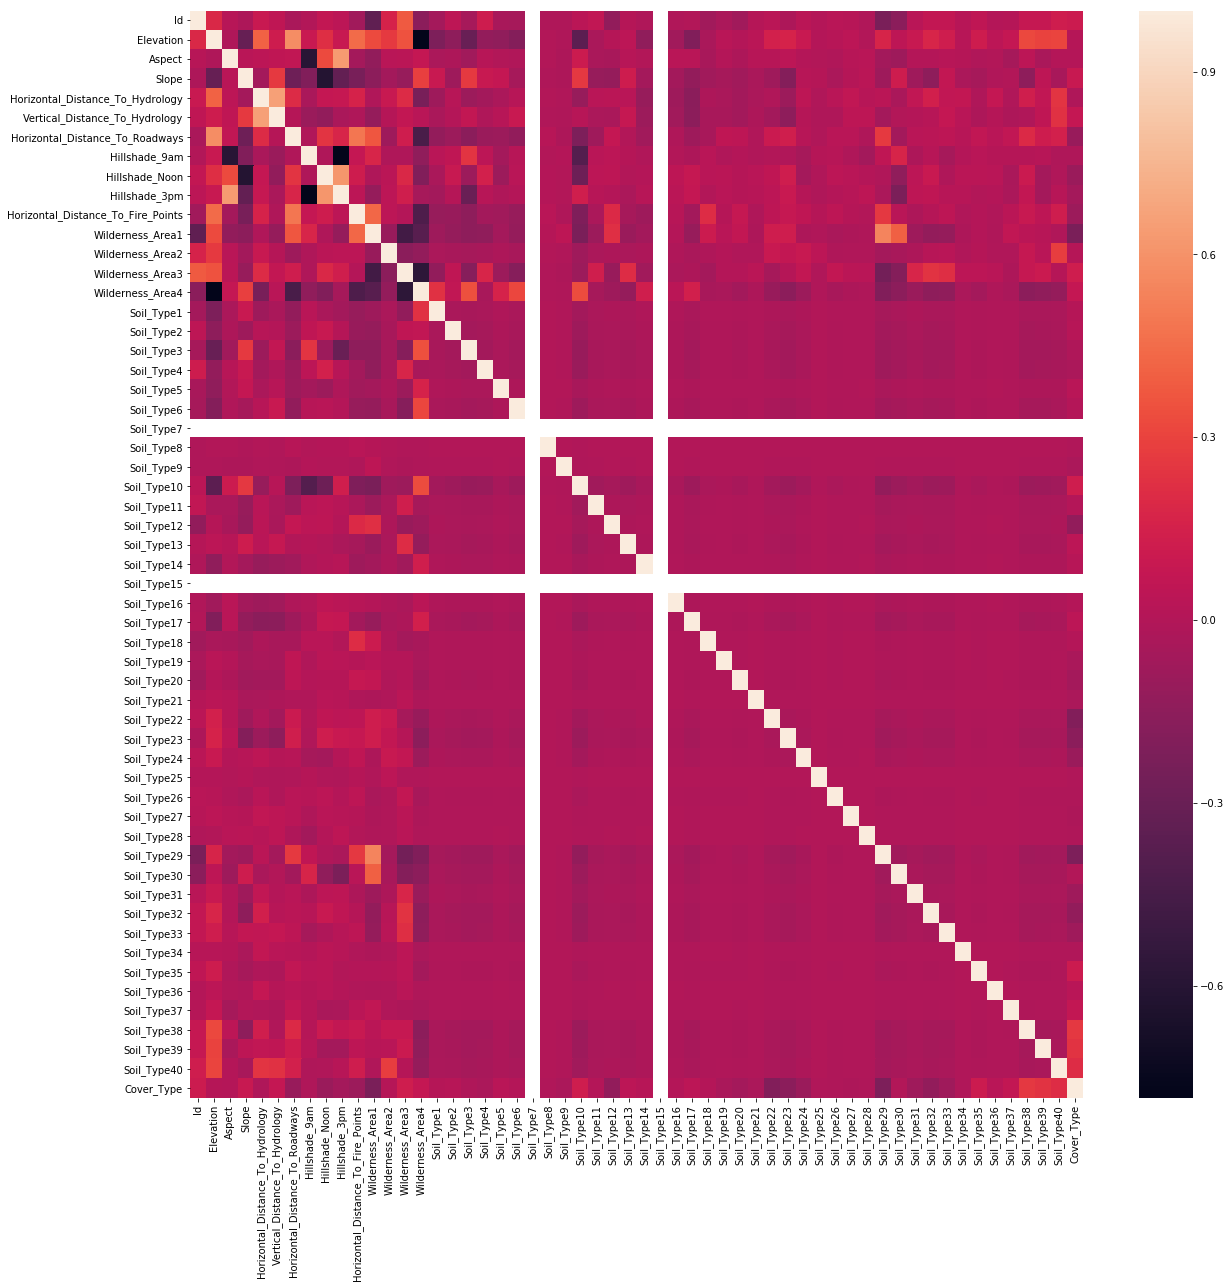

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),fmt=".2f")

##### From correlation analysis we can see that very few featues are depicting relation with one another , VERY FEW soil type are showing some corrleation with another and other variables, as we can see some white lines has been drawn up this due tp heatmap scaling of points

#####  We can see slope is increasing and  with elevation we are getting various forest covers so this variable is nececssary for us to interpret the type of cover


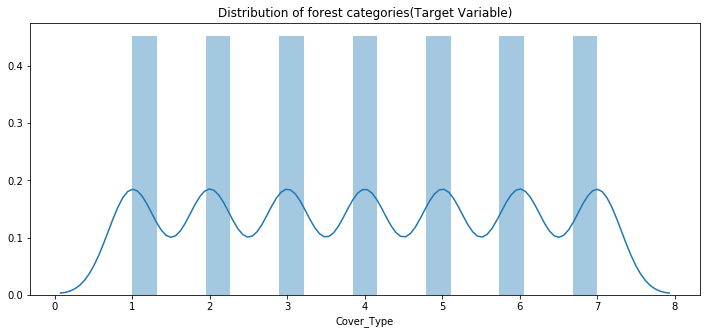

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of forest categories(Target Variable)")
ax = sns.distplot(train["Cover_Type"])

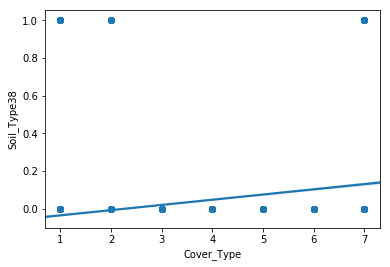

In [18]:
sns.regplot(y = 'Soil_Type38', x = 'Cover_Type', data= train )

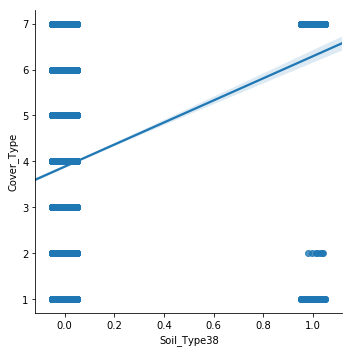

In [20]:
sns.lmplot(y= 'Cover_Type', x= 'Soil_Type38', data= train, x_jitter=.05)

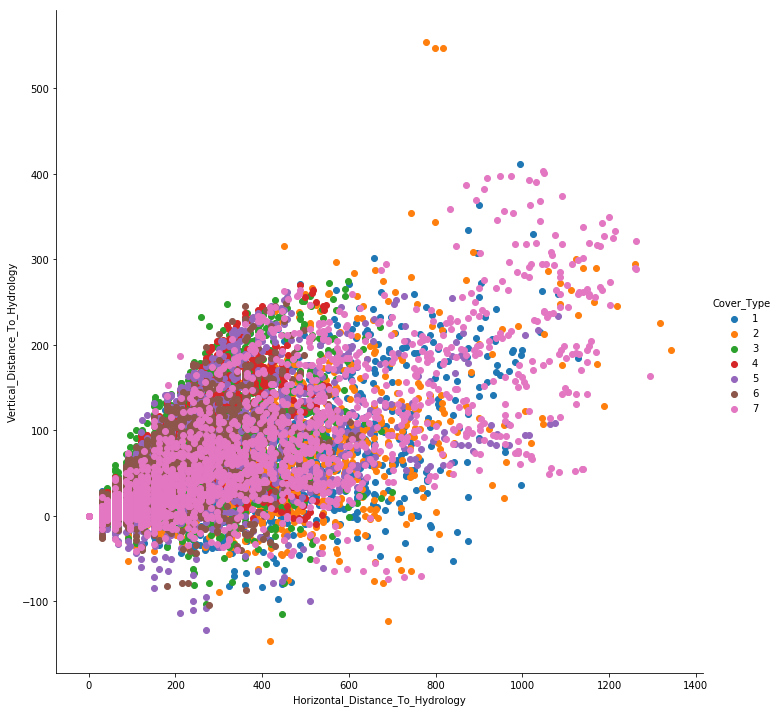

In [22]:
sns.FacetGrid(train, hue="Cover_Type", size=10).map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()

##### FacetGrid() - From the above graph we are mapping our dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset by using our target variable Cover_Type  and train as our data 
##### FacetGrid.map - takes these attributes (func, *args, **kwargs). I have used my function as scatter plot and arguments as predictive variables Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology

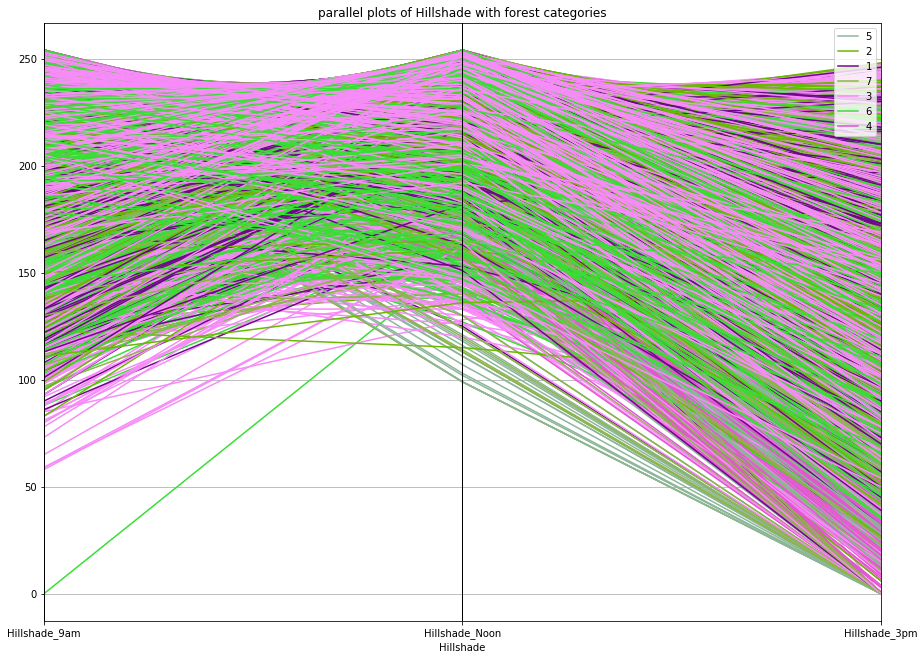

In [29]:
temp = train[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Cover_Type']]
plt.figure(figsize=(15,11))
plt.title("parallel plots of Hillshade with forest categories")
parallel_coordinates(temp,'Cover_Type')
plt.xlabel("Hillshade")
plt.show()

In [26]:
soil_list = []
soil_not=[7,8,15,25]
for i in range(1, 41):
    if i not in soil_not:
       soil_list.append('Soil_Type' + str(i))

wilderness_area_list = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

print(soil_list, "\n")
print(wilderness_area_list)

['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'] 

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


##### Above we are combining features for better visualization to get insights how cover is dependent on soil and various other features. So from above analysis we found thet Soil_Type7, Soil_Type8, Soil_Type15, Soil_Type25 are not important predictors.

## Model 1 : RANDOM FOREST 

In [52]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [45]:
cols = [i for i in train.columns if i not in ['Id', 'Cover_Type']]

predictor = train[cols] #exclude id & target columns
target = train['Cover_Type']

train_predictor, test_predictor, train_target, test_target = \
train_test_split(predictor, target, test_size=0.2)

In [46]:
model = RandomForestClassifier().fit(train_predictor, train_target)
predictions = model.predict(test_predictor)

In [47]:
metrics.accuracy_score(test_target, predictions)

0.8343253968253969

### Feature Importance 

In [51]:
fi= pd.DataFrame(model.feature_importances_, index=cols)
fi = fi.sort_values(by=0,ascending=False)
fi.columns = ['feature importance']
fi

,feature importance
Elevation,0.227625
Horizontal_Distance_To_Roadways,0.092579
Horizontal_Distance_To_Fire_Points,0.078329
Horizontal_Distance_To_Hydrology,0.062766
Vertical_Distance_To_Hydrology,0.056586
Hillshade_9am,0.051512
Aspect,0.049130
Hillshade_3pm,0.045430
Hillshade_Noon,0.044925
Slope,0.039832


##### Clearly from above output we can see that Soil_Type7, Soil_Type8, Soil_Type15, Soil_Type25 have 0 low feature importance.We Will dump them in final model so that processing can be faster.

### CONFUSION MATRIX

In [53]:
def forest(x):
    if x==1:
        return 'Spruce/Fir'
    elif x==2:
        return 'Lodgepole Pine'
    elif x==3:
        return 'Ponderosa Pine'
    elif x==4:
        return 'Cottonwood/Willow'
    elif x==5:
        return 'Aspen'
    elif x==6:
        return 'Douglas-fir'
    elif x==7:
        return 'Krummholz'

# Create pd Series for Original
Original = test_target.apply(lambda x: forest(x)).reset_index(drop=True)
Original.name = 'Original'

# Create pd Series for Predicted
Predicted = pd.DataFrame(predictions, columns=['Predicted'])
Predicted = Predicted['Predicted'].apply(lambda x: forest(x))

In [54]:
confusion = pd.crosstab(Original, Predicted)
confusion

Predicted,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
Original,,,,,,,
Aspen,412,0,8,0,18,6,7
Cottonwood/Willow,0,404,6,0,0,13,0
Douglas-fir,4,15,341,0,5,68,0
Krummholz,0,0,0,421,2,0,18
Lodgepole Pine,29,0,11,4,246,11,98
Ponderosa Pine,7,22,42,0,8,363,0
Spruce/Fir,6,0,3,25,65,0,336


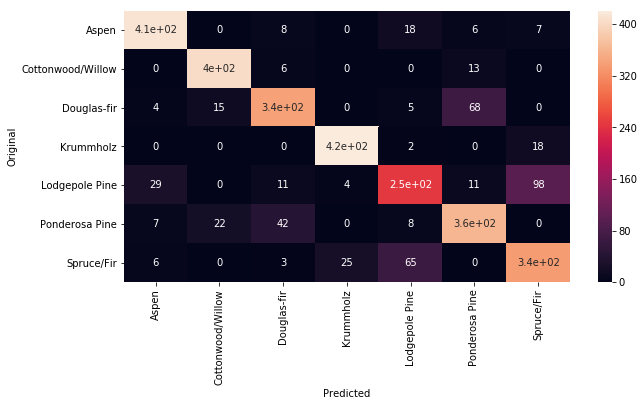

In [56]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion,annot=True);

In [63]:
model = RandomForestClassifier()

# removed some parameter queries so can upload notebook faster
grid_values = {'n_estimators':[200],
                'max_features':[0.2,0.5],
                'max_depth':[60],
                "criterion": ["gini"]}
grid = GridSearchCV(model, param_grid = grid_values, cv=5, n_jobs=-1)
grid.fit(predictor, target)

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 60, 'max_features': 0.5, 'n_estimators': 200}
0.7945767195767196


# CONCLUSION

BLA BLA BLA

# CONTRIBUTION

BLA BLA BLA


We did the assignment independently.We used the distplot,heapmap,pairplot,qqplot and i described all the functions with their uses and explained them. 

So,I contributed
By Own: 60%                                  

By External source: 15%

Provided by the professor : 25%

# CITATIONS

https://stackoverflow.com/questions/32261619/how-to-add-legend-on-seaborn-facetgrid-bar-plot

https://pandas.pydata.org/pandas-docs/stable/reference/

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/

https://seaborn.pydata.org/api.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing



# LICENSE

Copyright 2019 Newzy Sharma 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.